<a href="https://colab.research.google.com/github/Emilianaalia/HR-Analytics-Employee-Attrition/blob/main/HR_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**IBM HR Analytics Employee Attrition**

###### This project aims to analyze the factors that affect employee attrition, which is when an employee decides to leave the company. Dataset describes employee characteristics such as age, role job, job satisfaction, monthly income, years at the company, work life balance, and overtime. This dataset using both supervised and unsupervised learning.

##**Library**

In [ ]:
# for data manipulation and analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# supervised learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# unsupervised learning
from sklearn.cluster import KMeans

## **Load dataset**


In [ ]:
# Download dataset


import kagglehub

# Download latest version
path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

print("Path to dataset files:", path)

100%|██████████| 50.1k/50.1k [00:00<00:00, 35.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1


In [12]:
# Load the dataset
df = pd.read_csv(os.path.join(path, 'WA_Fn-UseC_-HR-Employee-Attrition.csv'))

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


##**Preprocessing data**

###**Drop unnecessary columns**

In [13]:
# drop columns that are not useful for modeling
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


###**encode categorical features**

In [14]:
# initialize labelencoder
label_encoder = LabelEncoder()

# encode categorical columns
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = label_encoder.fit_transform(df[columns])

###**Separate features and target**

In [15]:
# separate features x and target variable y
x = df.drop('Attrition', axis=1)
y = df['Attrition']

###**Feature scaling**

In [16]:
# Standardize the feature values
scaler = StandardScaler()
x = scaler.fit_transform(x)

##**Supervised Learning**

###**Split the dataset**

In [17]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

##**train data model**

In [18]:
# Initialize logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

###**Predictions**

In [19]:
# predict attrition on test data
y_pred = model.predict(X_test)

###**Evaluate model**

In [20]:
# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.891156462585034


In [21]:
# display classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294



In [26]:
from sklearn.metrics import confusion_matrix as cm_func

# Display confusion matrix
cm = cm_func(y_test, y_pred)
print(cm)


[[249   6]
 [ 26  13]]


###**Conclusion**

##### Based on the results of supervised learning using the Logistic Regression method, it is possible to predict employee attrition quite well by identifying employees who will not leave the company. This can be seen from the high number of predictions in the non-attrition class. However, the model's performance in detecting employees who leave still needs to be improved.

##**Unsupervised**

###**Select features for clustering**

In [27]:
# select numerical clustering
X_cluster = df[['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobSatisfaction', 'WorkLifeBalance']]

###**Feature scaling**

In [28]:
# Standardize the features for clustering
scaler = StandardScaler()
X_cluster = scaler.fit_transform(X_cluster)

###**Determine the number of cluster**

In [29]:
# elbow method to find optimal number of cluster
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_cluster)
    wcss.append(kmeans.inertia_)

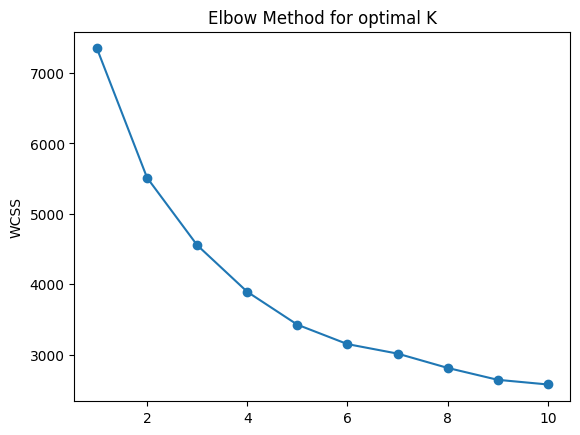

In [30]:
# Plot the elbow curve
plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for optimal K')
plt.show()

###**Apply K-means clustering**

In [32]:
# Apply K-Means with chosen number of cluster
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

# add cluster labels to the dataset
df['Cluster'] = clusters

###**Visualize the cluster**

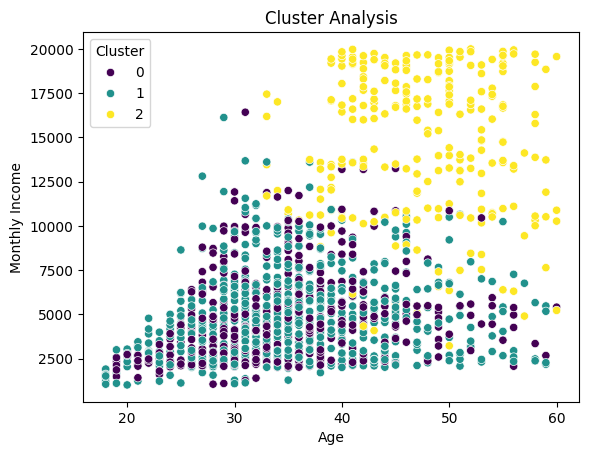

In [34]:
# visualize cluster using age and monthlt income
plt.figure()
sns.scatterplot(
    x=df['Age'],
    y=df['MonthlyIncome'],
    hue=df['Cluster'],
    palette='viridis'
)
plt.title('Cluster Analysis')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.show()

###**Conclusion**

##### Based on visualization, Unsupervised has several clusters, namely age and monthly income, and the visualization results show that each cluster has a different pattern, such as groups of employees with low, medium, and high incomes. Because it uses Unsupervised, which is done without target labels, this process is able to reveal hidden structures in the data and help in understanding employee segmentation.